
Author1 = Sajid Ahmed

Author2 = Mehjabeen Shachi



In [414]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [415]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline
from math import sqrt 
import warnings
from collections import Counter 

In [416]:
#load csv and exel dataset
df1 = pd.read_csv('/content/drive/MyDrive/insight_001.csv')
print(df1.shape)
df2 = pd.read_excel ('/content/drive/MyDrive/insight_002.xlsx')
print(df2.shape)


(29, 1226)
(292, 33)


In [417]:
df1.columns

Index(['Date', 'Lifetime Total Likes', 'Daily New Likes', 'Daily Unlikes',
       'Daily Page Engaged Users', 'Weekly Page Engaged Users',
       '28 Days Page Engaged Users', 'Daily Total Reach', 'Weekly Total Reach',
       '28 Days Total Reach',
       ...
       'Weekly Total web site click count per Page by age and gender - 55-64.U',
       'Weekly Total web site click count per Page by age and gender - 65+.F',
       'Weekly Total web site click count per Page by age and gender - 65+.M',
       'Weekly Total web site click count per Page by age and gender - 65+.U',
       'Weekly Total web site click count per Page by age and gender - &lt;13.F',
       'Weekly Total web site click count per Page by age and gender - &lt;13.M',
       'Weekly Total web site click count per Page by age and gender - &lt;13.U',
       'Weekly Total web site click count per Page by age and gender - UNKNOWN.F',
       'Weekly Total web site click count per Page by age and gender - UNKNOWN.M',
       'We

In [418]:
df2.columns

Index(['Post ID', 'Post Message', 'Type', 'Countries', 'Languages', 'Posted',
       'Audience Targeting', 'Lifetime Post Total Reach',
       'Lifetime Post organic reach', 'Lifetime Post Paid Reach',
       'Lifetime Post Total Impressions', 'Lifetime Post Organic Impressions',
       'Lifetime Post Paid Impressions', 'Lifetime Engaged Users',
       'Lifetime Matched Audience Targeting Consumers on Post',
       'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Negative Feedback from Users', 'Lifetime Negative Feedback',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime Post Paid Impressions by people who have liked your Page',
       'Lifetime Paid reach of a post by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Lifetime Organic views to 95%', 'Lifetime Organic views to 95%.1',
       'Lifetim

In [419]:
df1.head()

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,Weekly Organic Reach,28 Days Organic Reach,Daily Paid Reach,Weekly Paid Reach,28 Days Paid Reach,Daily Viral Reach,Weekly Viral Reach,28 Days Viral Reach,Daily Total Impressions,Weekly Total Impressions,28 Days Total Impressions,Daily Organic impressions,Weekly Organic impressions,28 Days Organic impressions,Daily Paid Impressions,Weekly Paid Impressions,28 Days Paid Impressions,Daily Viral impressions,Weekly Viral impressions,28 Days Viral impressions,Daily Logged-in Page Views,Weekly Logged-in Page Views,Daily Logged-in Page Views.1,Weekly Logged-in Page Views.1,Daily Reach Of Page Posts,Weekly Reach Of Page Posts,28 Days Reach Of Page Posts,Daily Organic Reach of Page posts,Weekly Organic Reach of Page posts,...,Daily Total web site click count per Page by age and gender - 45-54.U,Daily Total web site click count per Page by age and gender - 55-64.F,Daily Total web site click count per Page by age and gender - 55-64.M,Daily Total web site click count per Page by age and gender - 55-64.U,Daily Total web site click count per Page by age and gender - 65+.F,Daily Total web site click count per Page by age and gender - 65+.M,Daily Total web site click count per Page by age and gender - 65+.U,Daily Total web site click count per Page by age and gender - &lt;13.F,Daily Total web site click count per Page by age and gender - &lt;13.M,Daily Total web site click count per Page by age and gender - &lt;13.U,Daily Total web site click count per Page by age and gender - UNKNOWN.F,Daily Total web site click count per Page by age and gender - UNKNOWN.M,Daily Total web site click count per Page by age and gender - UNKNOWN.U,Weekly Total web site click count per Page by age and gender - 13-17.F,Weekly Total web site click count per Page by age and gender - 13-17.M,Weekly Total web site click count per Page by age and gender - 13-17.U,Weekly Total web site click count per Page by age and gender - 18-24.F,Weekly Total web site click count per Page by age and gender - 18-24.M,Weekly Total web site click count per Page by age and gender - 18-24.U,Weekly Total web site click count per Page by age and gender - 25-34.F,Weekly Total web site click count per Page by age and gender - 25-34.M,Weekly Total web site click count per Page by age and gender - 25-34.U,Weekly Total web site click count per Page by age and gender - 35-44.F,Weekly Total web site click count per Page by age and gender - 35-44.M,Weekly Total web site click count per Page by age and gender - 35-44.U,Weekly Total web site click count per Page by age and gender - 45-54.F,Weekly Total web site click count per Page by age and gender - 45-54.M,Weekly Total web site click count per Page by age and gender - 45-54.U,Weekly Total web site click count per Page by age and gender - 55-64.F,Weekly Total web site click count per Page by age and gender - 55-64.M,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
0,NaN,Lifetime: The total number of people who have ...,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Weekly: The number of pe

In [420]:
#skipping first row of the dataframe as first row contains the description of the columns
new_df1=df1.tail(-1)
new_df1

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,Weekly Organic Reach,28 Days Organic Reach,Daily Paid Reach,Weekly Paid Reach,28 Days Paid Reach,Daily Viral Reach,Weekly Viral Reach,28 Days Viral Reach,Daily Total Impressions,Weekly Total Impressions,28 Days Total Impressions,Daily Organic impressions,Weekly Organic impressions,28 Days Organic impressions,Daily Paid Impressions,Weekly Paid Impressions,28 Days Paid Impressions,Daily Viral impressions,Weekly Viral impressions,28 Days Viral impressions,Daily Logged-in Page Views,Weekly Logged-in Page Views,Daily Logged-in Page Views.1,Weekly Logged-in Page Views.1,Daily Reach Of Page Posts,Weekly Reach Of Page Posts,28 Days Reach Of Page Posts,Daily Organic Reach of Page posts,Weekly Organic Reach of Page posts,...,Daily Total web site click count per Page by age and gender - 45-54.U,Daily Total web site click count per Page by age and gender - 55-64.F,Daily Total web site click count per Page by age and gender - 55-64.M,Daily Total web site click count per Page by age and gender - 55-64.U,Daily Total web site click count per Page by age and gender - 65+.F,Daily Total web site click count per Page by age and gender - 65+.M,Daily Total web site click count per Page by age and gender - 65+.U,Daily Total web site click count per Page by age and gender - &lt;13.F,Daily Total web site click count per Page by age and gender - &lt;13.M,Daily Total web site click count per Page by age and gender - &lt;13.U,Daily Total web site click count per Page by age and gender - UNKNOWN.F,Daily Total web site click count per Page by age and gender - UNKNOWN.M,Daily Total web site click count per Page by age and gender - UNKNOWN.U,Weekly Total web site click count per Page by age and gender - 13-17.F,Weekly Total web site click count per Page by age and gender - 13-17.M,Weekly Total web site click count per Page by age and gender - 13-17.U,Weekly Total web site click count per Page by age and gender - 18-24.F,Weekly Total web site click count per Page by age and gender - 18-24.M,Weekly Total web site click count per Page by age and gender - 18-24.U,Weekly Total web site click count per Page by age and gender - 25-34.F,Weekly Total web site click count per Page by age and gender - 25-34.M,Weekly Total web site click count per Page by age and gender - 25-34.U,Weekly Total web site click count per Page by age and gender - 35-44.F,Weekly Total web site click count per Page by age and gender - 35-44.M,Weekly Total web site click count per Page by age and gender - 35-44.U,Weekly Total web site click count per Page by age and gender - 45-54.F,Weekly Total web site click count per Page by age and gender - 45-54.M,Weekly Total web site click count per Page by age and gender - 45-54.U,Weekly Total web site click count per Page by age and gender - 55-64.F,Weekly Total web site click count per Page by age and gender - 55-64.M,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
1,2/7/2021,9239,3,2,29,928,4219,921,8867,31929,918,8855,31908,NaN,NaN,NaN,813,6408,28265,1492,22473,163733,1456,21967,158254,NaN,NaN,NaN,1258,11841,113623,36,553,24,253,918,8855,31908,918,8855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [421]:
#skipping first row of the dataframe as first row contains the description of the columns
new_df2=df2.tail(-1)
new_df2

,Post ID,Post Message,Type,Countries,Languages,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
1,1277547548992987_1741796732568064,Congratulations to the winners of the first on...,Photo,NaN,NaN,2018-06-22 07:58:04,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1277547548992987_1731769263570811,May your Eid celebrations be as charming as th...,Video,NaN,NaN,2018-06-15 13:43:23,,1556,1556,0,3125,3125,0,148,98,158,0,0,2119,1001,0,0,108,72,93,0,0,389,500,0,0,5035,24355
3,1277547548992987_1731343926946678,Wishing everyone a very happy Eid al-Fitr. As ...,Photo,NaN,NaN,2018-06-15 06:57:45,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1277547548992987_1727479250666479,What's trending this eid? 🤔,Photo,NaN,NaN,2018-06-12 11:33:50,,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1277547548992987_1725257400888664,Hey IDCians! We are here with our first online...,Photo,NaN,NaN,2018-06-10 08:50:56,,2,2,0,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1277547548992987_3467535573327496,Hear about the prestigious global finale and t...,Status,NaN,NaN,2020-10-16 02:05:24,,634,634,0,726,726,0,4,3,3,0,0,539,456,0,0,4,0,0,0,0,0,0,0,0,0,0
288,1277547548992987_3446951235385930,To know more about RB Global Challenge and How...,SharedVideo,NaN,NaN,2020-10-09 02:25:41,,654,654,0,758,758,0,10,7,8,0,0,590,492,0,0,10,0,0,0,0,53,54,0,0,0,15145
289,1277547548992987_3425382470876140,Registration window of RB Global Challenge is ...,SharedVideo,NaN,NaN,2020-10-02 07:00:42,,488,488,0,563,563,0,8,5,6,0,0,400,340,0,0,8,0,0,0,0,16,16,0,0,0,115008
290,1277547548992987_3419141484833572,"The Result: Nin presents ""Spill the Ink""!! --...",Photo,NaN,NaN,2020-09-30 08:30:47,,969,969,0,1148,1148,0,26,13,17,0,0,888,719,0,0,24,0,0,0,0,0,0,0,0,0,0


In [422]:
new_df1.isnull().sum()

Date                                                                         0
Lifetime Total Likes                                                         0
Daily New Likes                                                              2
Daily Unlikes                                                               12
Daily Page Engaged Users                                                     0
                                                                            ..
Weekly Total web site click count per Page by age and gender - &lt;13.M      0
Weekly Total web site click count per Page by age and gender - &lt;13.U      0
Weekly Total web site click count per Page by age and gender - UNKNOWN.F     0
Weekly Total web site click count per Page by age and gender - UNKNOWN.M     0
Weekly Total web site click count per Page by age and gender - UNKNOWN.U     0
Length: 1226, dtype: int64

In [423]:
# checking for duplicate rows
new_df1[new_df1.duplicated()].shape

(0, 1226)

In [424]:
# checking the null values of all columns
new_df2.isnull().sum()

Post ID                                                                  0
Post Message                                                            18
Type                                                                     2
Countries                                                              291
Languages                                                              291
Posted                                                                   0
Audience Targeting                                                       0
Lifetime Post Total Reach                                                0
Lifetime Post organic reach                                              0
Lifetime Post Paid Reach                                                 0
Lifetime Post Total Impressions                                          0
Lifetime Post Organic Impressions                                        0
Lifetime Post Paid Impressions                                           0
Lifetime Engaged Users   

# We are going to analyse the post message of this organization




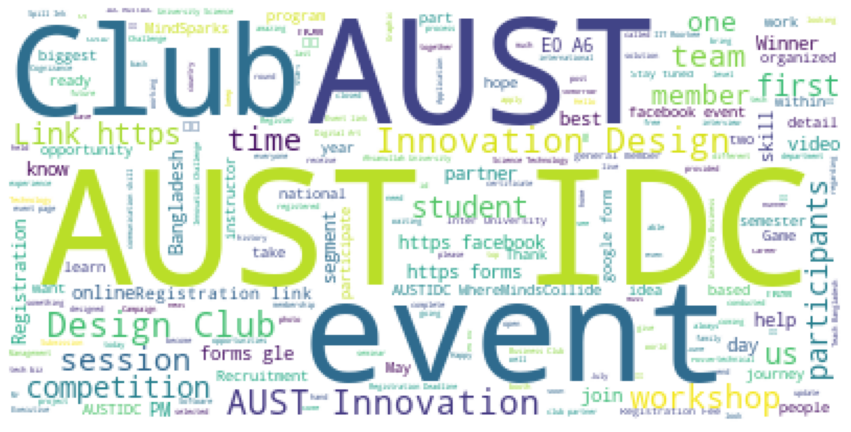

In [425]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
stopwords.update([ "will","make"])

text = ' '.join(new_df2['Post Message'].astype(str))
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Generate plot
plt.figure(figsize = (15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

From the above word cloud we can say that the organization name is AUST IDC which is a non-profit club of Ahsanullah University of Science and Technology,Bangladesh.
It arranges several competitions,workshops for the university students.

# Analysis of Post type with Life Time Engaged Users

Type
Link           [70, 0, 0, 0, 0, 0, 0, 0, 0, 48, 161, 310, 41,...
Photo          [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SharedVideo    [94, 64, 141, 147, 70, 139, 76, 31, 18, 22, 28...
Status         [0, 0, 0, 0, 0, 0, 0, 217, 849, 18, 166, 151, ...
Video          [148, 245, 630, 342, 162, 238, 348, 242, 375, ...
Name: Lifetime Engaged Users, dtype: object
{'Link': 1120, 'Photo': 27067, 'SharedVideo': 1066, 'Status': 2523, 'Video': 13853}


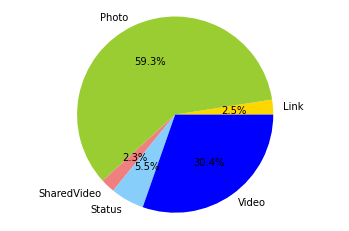

In [426]:
labels = []
sizes = []

#print(df2.Type.value_counts())
#print(df2['Lifetime Engaged Users'].value_counts())

result = new_df2.groupby('Type')['Lifetime Engaged Users'].apply(list)
print(result)

sum_result_dict={}

for Type,users in result.items():
     sum_result_dict[Type]=sum(users)
     labels.append(Type)
     sizes.append(sum_result_dict[Type])

print(sum_result_dict)



colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0, 0, 0, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)

plt.axis('equal')
plt.show()





From above pie chart we can say that Photo and Video type post make the users more engaged.So, they should post more this type of post to attract more users.


# Analysis of videos watch by the users for 28 days


28 Days Total Organic Views
28 Days Total Organic 30-Second Views
28 Days Total Video Views
28 Days Total Auto-Played Views
28 Days Total Clicked Views
28 Days Video Repeats
28 Days Total Unique Video Views
28 Days Total 30-Second Views
28 Days Auto-Played 30-Second Views
28 Days Total Clicked 30-Second Views
28 Days Total 30-Second Repeats
28 Days Total Unique 30-Second Views


Text(0.5, 0, 'X axis')

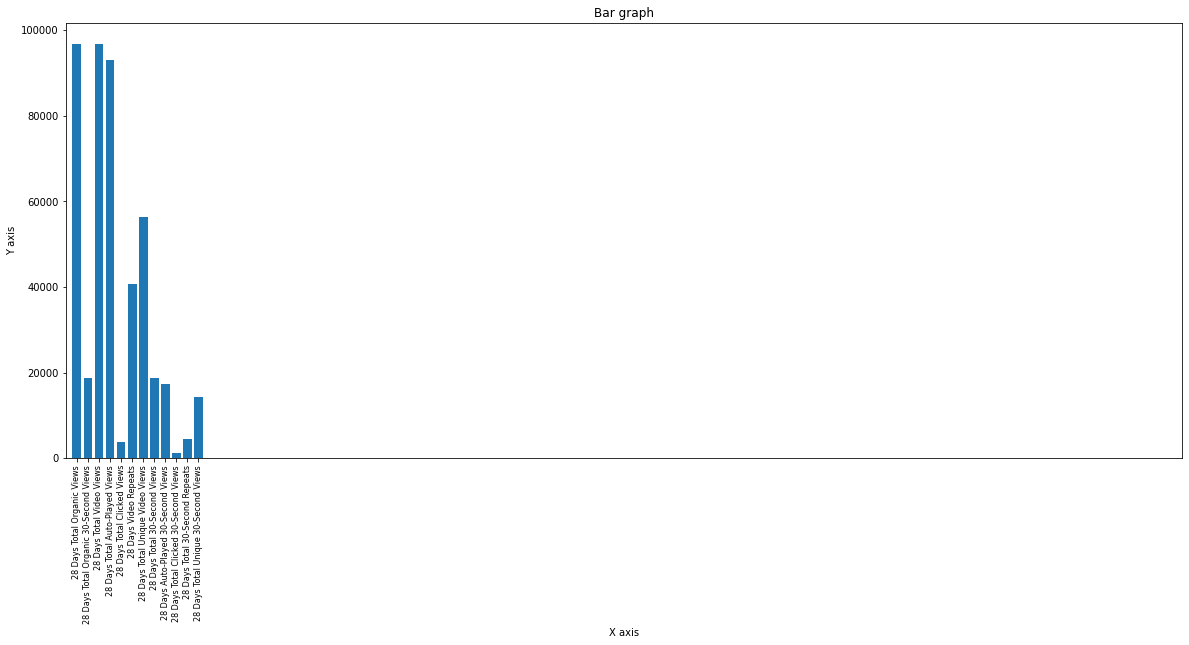

In [427]:
# only take the columns for video analysis for 28 days
starting=85
ending=125
pattern='28 Days'

x=[]
y=[]

for i in range(starting,ending+1):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
    if(feature.__contains__(pattern)):
        if(new_df1[feature].isna().any()==False):
            #print(new_df1[feature])
            print(feature)
            x.append(feature)
            y.append(sum(new_df1[feature].astype(int)))
        


# Set the figure size
fig = plt.figure(10, [20, 8])
ax = fig.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,100)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=8, rotation='vertical')

plt.bar(x, y) 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

From above we can say,In case of video posts, auto played videos have the most views and clicked videos have the least views. So, increasing the number of auto played videos can promote more views

# Analysis of paid promotion and unpaid promotion

28 Days Organic Reach
28 Days Paid Reach
28 Days Organic impressions
28 Days Paid Impressions
28 Days Organic Reach of Page posts
28 Days Paid Reach of Page posts
28 Days Organic impressions of your posts
28 Days Paid impressions of your posts
28 Days Total Organic Views
28 Days Total Promoted Views
28 Days Total Organic 30-Second Views
28 Days Paid 30-Second Views


Text(0.5, 0, 'X axis')

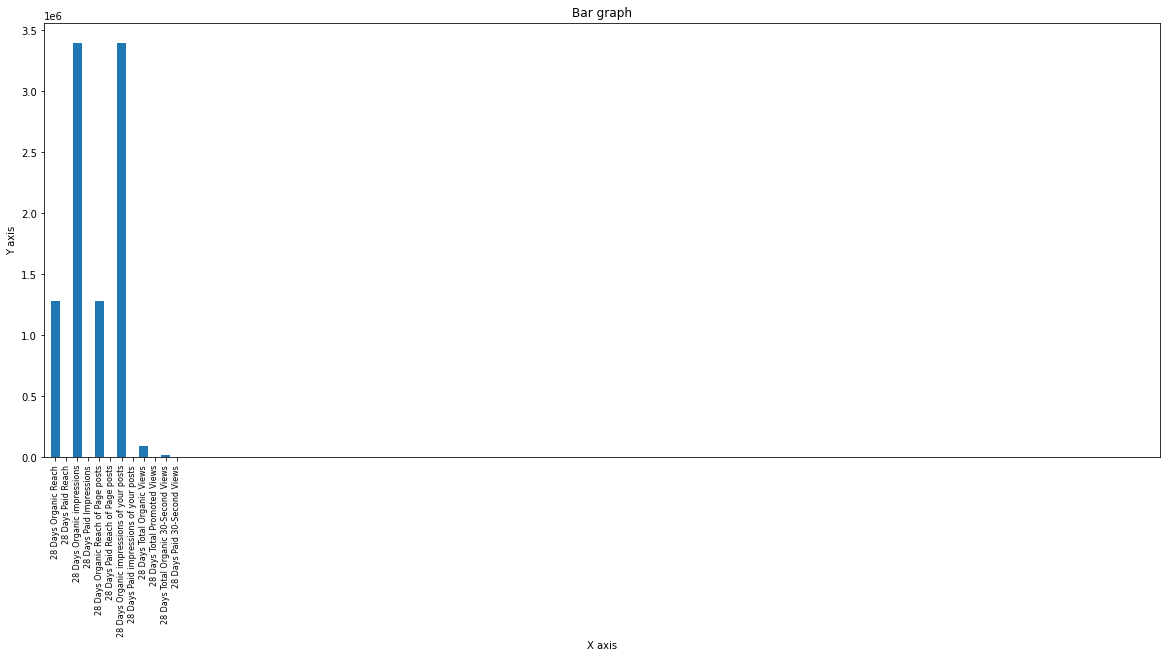

In [428]:
starting= 1
ending  = len(new_df1.columns)
#paid marketing column patterns
pattern1='Paid'
pattern2='Promoted'
pattern4='28 Days'
#unpaid marketing column pattern
pattern3='Organic'

x=[]
y=[]


# filtering the required columns and plot the data in bar chart
for i in range(starting,ending):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
    if( (feature.__contains__(pattern1) and  feature.__contains__(pattern4)) 
    or (feature.__contains__(pattern2)and  feature.__contains__(pattern4)) 
    or  (feature.__contains__(pattern3)and feature.__contains__(pattern4))     ):

            result = new_df1[feature].fillna(0, inplace=False)
            #print(new_df1[feature])
            print(feature)
            x.append(feature)
            y.append(sum(result.astype(int)))
        


# Set the figure size
fig = plt.figure(10, [20, 8])
ax = fig.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,100)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=8, rotation='vertical')

plt.bar(x, y) 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')   

From the above we can say that this organization dont use paid promotion to reach the users.So ,it is confirmed that they dont have the donor/sponsors for paid promotion.
They use free promotion to reach the target audience.




 
# Analyze of users who like the page of this organization and their time table of daily online status





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'X axis')

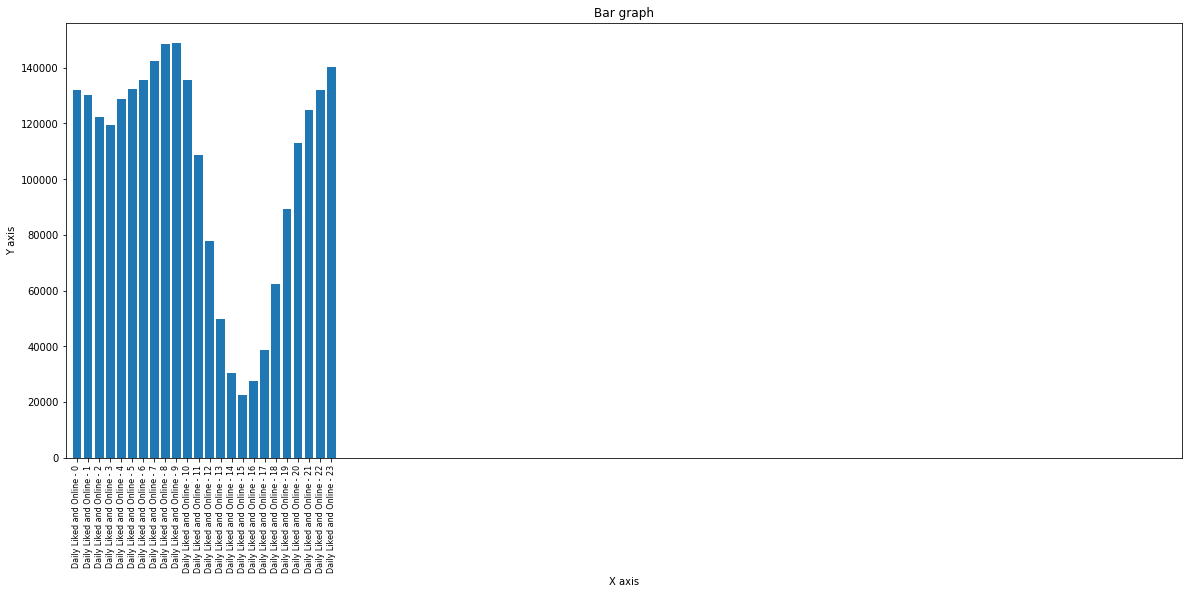

In [429]:
starting= 1010
ending  = 1010+24

# for i in range(starting,ending):
#      print(new_df1.columns[i])

x=[]
y=[]


# filtering the relevant columns and plot the values on bar chart
for i in range(starting,ending):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
   

    new_df1[feature] = new_df1[feature].fillna(0, inplace=False)
    #print(new_df1[feature])
    #print(feature)
    x.append(feature)
    y.append(sum(new_df1[feature].astype(int)))
        


# Set the figure size
fig = plt.figure(10, [20, 8])
ax = fig.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,100)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=8, rotation='vertical')

plt.bar(x, y) 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

From above we can say that liked users are mostly online around morning 6.AM ,midnight and evening . 



# Now we are going to analyse 28 days record , how much people talk about this organization in Bangladesh and other countries.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'X axis')

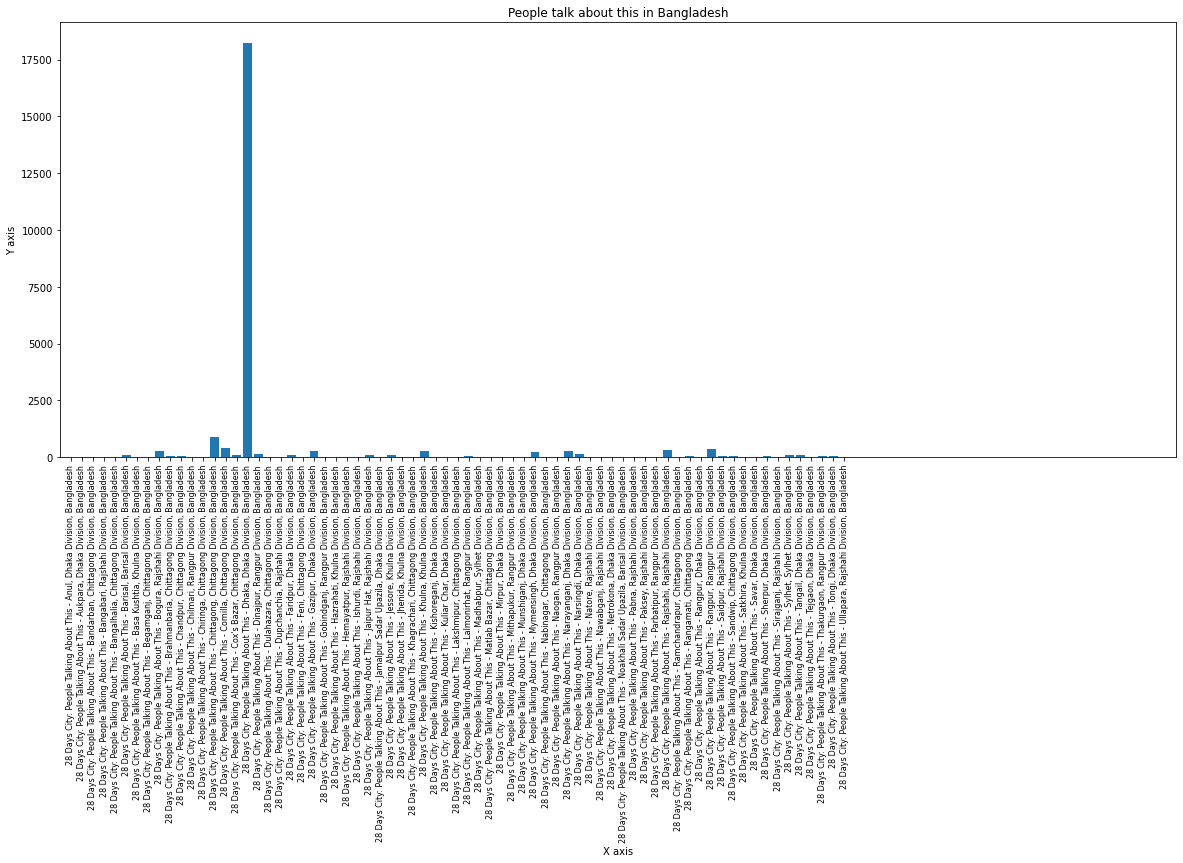

In [430]:
starting= 813
ending  = 913

pattern1='28 Days City: People Talking About This'
pattern2='Bangladesh'

x=[]
y=[]


# filtering the relevant columns for this analysis and plot them into bar chart
for i in range(starting,ending):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
    
    if(feature.__contains__(pattern1) and  feature.__contains__(pattern2)):

            new_df1[feature] = new_df1[feature].fillna(0, inplace=False)
            #print(new_df1[feature])
            #print(feature)
            x.append(feature)
            y.append(sum(new_df1[feature].astype(int)))
        


# Set the figure size
fig = plt.figure(10, [20, 8])
ax = fig.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,100)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=8, rotation='vertical')

plt.bar(x, y) 
plt.title('People talk about this in Bangladesh') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 



From above bar chart we can say , In bangladesh, mostly people living in Dhaka talk about the posts



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'X axis')

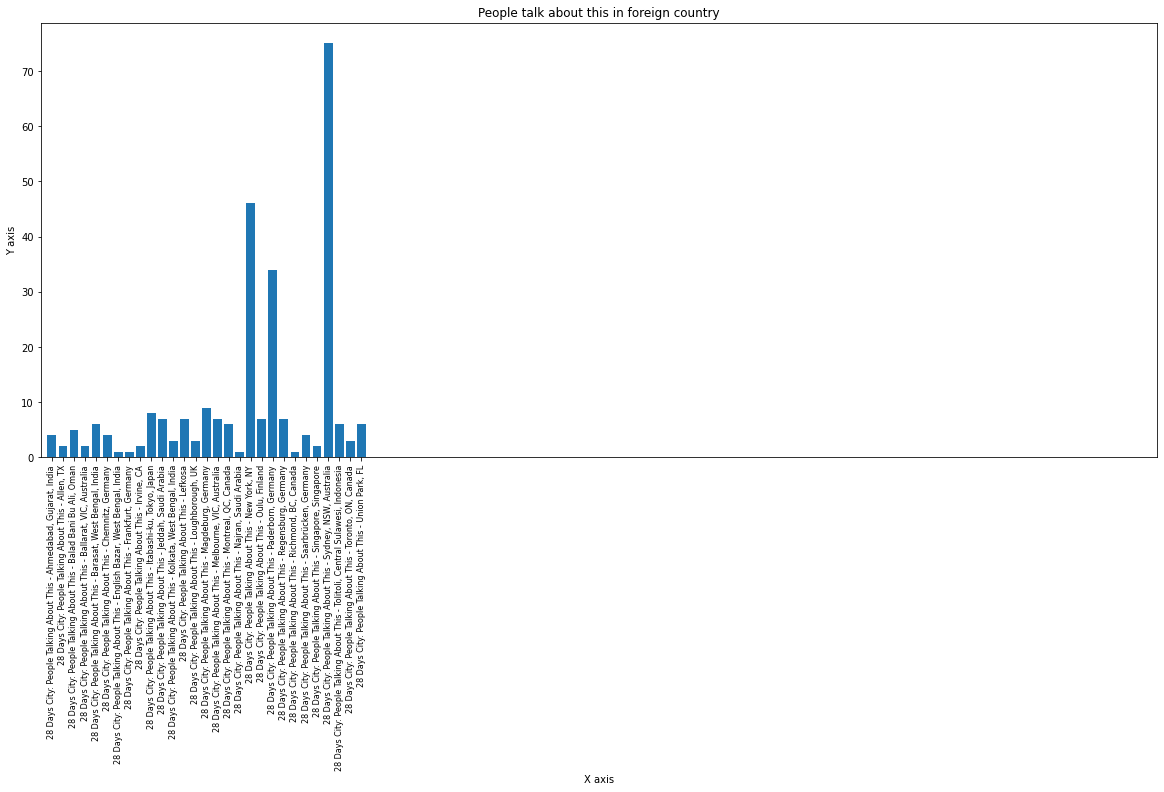

In [431]:
starting= 813
ending  = 913

pattern1='28 Days City: People Talking About This'
pattern2='Bangladesh'

x1=[]
y1=[]
# filtering the relevant columns for this analysis and plot them into bar chart
for i in range(starting,ending):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
    if(feature.__contains__(pattern1) and  feature.__contains__(pattern2)==False):
            new_df1[feature] = new_df1[feature].fillna(0, inplace=False)
            #print(new_df1[feature])
            #print(feature)
            x1.append(feature)
            y1.append(sum(new_df1[feature].astype(int)))
    
        


# Set the figure size
fig = plt.figure(10, [20, 8])
ax = fig.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,100)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=8, rotation='vertical')



plt.bar(x1, y1) 
plt.title('People talk about this in foreign country') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 

From above we can say, In case of abroad, people living in Australia talk about the post more than other countries

### **Now Showing progress of several attributes in respect with date**

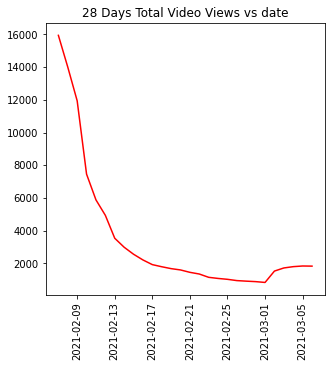

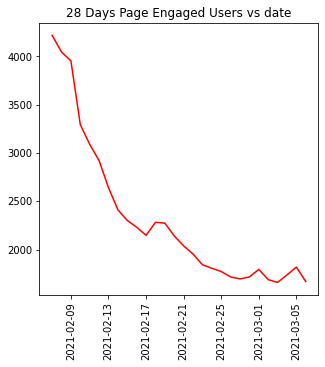

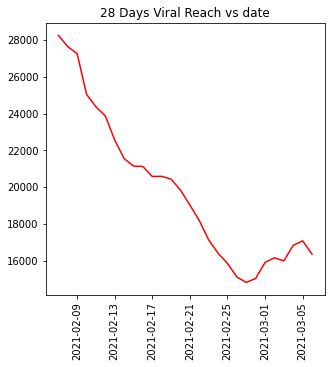

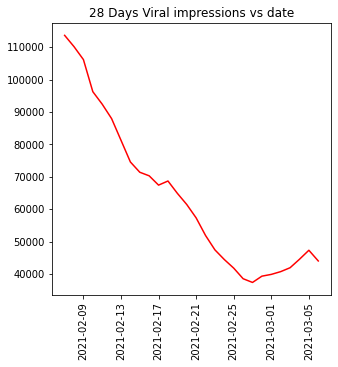

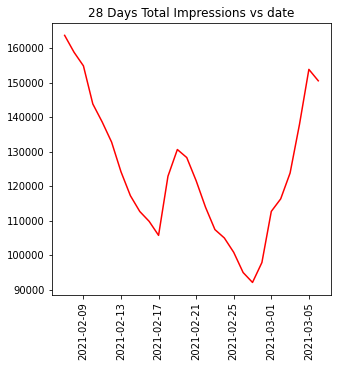

In [432]:


attributes=['28 Days Total Video Views','28 Days Page Engaged Users','28 Days Viral Reach','28 Days Viral impressions','28 Days Total Impressions']



dates = [pd.to_datetime(d) for d in new_df1['Date']]

# print(dates)

# plt.scatter(dates, new_df1['28 Days Page Engaged Users'].astype(int), c = 'red')
# plt.xticks(rotation = 'vertical')

cnt=0
for feature in attributes:
    cnt+=1
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(dates,new_df1[feature].astype(int),'r')
    plt.xticks(rotation = 'vertical')
    ax.set_title(feature+" vs date")




Total video views are decreasing drastically. So video quality should be improved.

This page need to post more interesting content to increase user engagement ,viral reach and impression.

## Now Showing progress of several attributes in respect with date

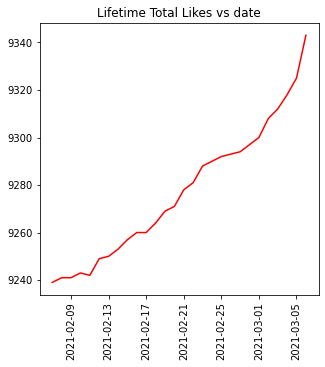

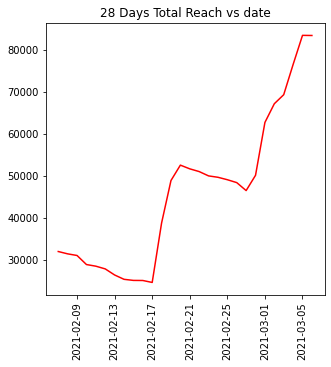

In [433]:


attributes=['Lifetime Total Likes','28 Days Total Reach',]



dates = [pd.to_datetime(d) for d in new_df1['Date']]



cnt=0
for feature in attributes:
    cnt+=1
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(dates,new_df1[feature].astype(int),'r')
    plt.xticks(rotation = 'vertical')
    ax.set_title(feature+" vs date")




# Suggestions:


*   Nonprofit organization success depends on the relationships you develop with your target audience. 

*   Involve your audience by sharing stories of people who have benefited from the organization. You can also ask donors to share their stories if they have personally benefited from your work.



*   Create content with video or photos on your website or social media to engage more users . 



*   Using social media can also help increase donor attention for your nonprofit. You can use Facebook ads and schedule these to run when your target audience is online, and you can do this for a relatively low price.

*   Facebook has an advanced location targeting option and with this you can target users in certain locations.As we have seen from the above chart , the number of people in abroad are relatively low who talk about this organization.So, you can target some good countries that will increase the chance of getting the sponsors/donors. 






